# Requirements

In [23]:
# Add as many imports as you need.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Laboratory Exercise - Run Mode (8 points)

## The Vacation Preferences Dataset
The dataset contains information about individuals and their vacation preferences. It includes details such as age, gender, income, and education level. It also provides insights into their vacation habits, like the number of vacations taken each year, preferred activities (such as hiking, swimming, skiing, or sunbathing), and their budget for vacations. Other information includes the type of place they live in (urban, suburban, or rural), how far they live from mountains and beaches, and their favorite season for vacations (summer, winter, spring, or fall). The dataset also contains information whether they have pets and if they are concerned about the environment. All these features serve as input variables for predictive modeling. The 'Preference' attribute serves as the target variable, where 1 represents preference for mountains, 0 for beaches.

Load the dataset into a `pandas` data frame.

In [24]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv('datasets/vacation_preferences_data.csv')

Preprocess the input and the output variables appropriately.

In [25]:
# Write your code here. Add as many boxes as you need.
df.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56.0,male,71477,bachelor,9,skiing,2477,urban,175.0,267,summer,0,1,1
1,69.0,male,88740,master,1,swimming,4777,suburban,NaN,190,fall,0,1,0
2,46.0,female,46562,master,0,skiing,1469,urban,71.0,280,winter,0,0,1
3,32.0,non-binary,99044,high school,6,hiking,1482,rural,31.0,255,summer,1,0,1
4,60.0,female,106583,high school,5,sunbathing,516,suburban,23.0,151,winter,1,1,0


Explore the dataset using visualizations of your choice.

<Figure size 1500x1500 with 0 Axes>

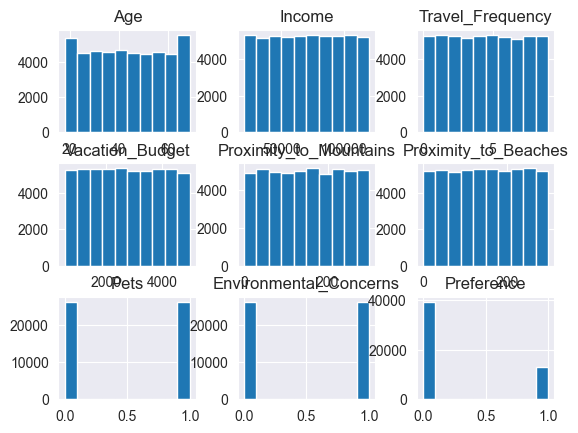

In [26]:
# Write your code here. Add as many boxes as you need.
plt.figure(figsize=(15, 15))
df.hist()
plt.show()

Check if the dataset is balanced.

In [27]:
# Write your code here. Add as many boxes as you need.

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [28]:
# Write your code here. Add as many boxes as you need.
df.isnull().sum() / len(df) * 100

Age                       9.999237
Gender                    0.000000
Income                    0.000000
Education_Level           4.999619
Travel_Frequency          0.000000
Preferred_Activities      0.000000
Vacation_Budget           0.000000
Location                  0.000000
Proximity_to_Mountains    4.999619
Proximity_to_Beaches      0.000000
Favorite_Season           0.000000
Pets                      0.000000
Environmental_Concerns    0.000000
Preference                0.000000
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

In [29]:
# Write your code here. Add as many boxes as you need.
encoder = LabelEncoder()

for column in df.columns:
    if type(df[column].tolist()[0]) == str:
        df[column] = encoder.fit_transform(df[column])

In [30]:
df

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56.0,1,71477,0,9,1,2477,2,175.0,267,2,0,1,1
1,69.0,1,88740,3,1,3,4777,1,NaN,190,0,0,1,0
2,46.0,0,46562,3,0,1,1469,2,71.0,280,3,0,0,1
3,32.0,2,99044,2,6,0,1482,0,31.0,255,2,1,0,1
4,60.0,0,106583,2,5,2,516,1,23.0,151,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52439,67.0,0,85325,3,3,0,1762,1,51.0,262,0,1,0,1
52440,37.0,0,110346,0,7,3,1676,2,259.0,84,1,1,0,0
52441,53.0,2,71080,1,7,3,3877,2,NaN,27,0,0,1,0
52442,40.0,0,75174,1,9,3,4620,1,173.0,10,2,0,1,0


In [31]:
df['Education_Level'].unique()

array([0, 3, 2, 1, 4])

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [32]:
# Write your code here. Add as many boxes as you need.
# Ako treba da koristis KNN imputer, NE koristi StandardScaler, KORISTI MinMax
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Age','Education_Level','Proximity_to_Mountains']])
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(scaled_data)

In [33]:
imputed_data = scaler.inverse_transform(imputed_data)

In [34]:
df[['Age','Education_Level','Proximity_to_Mountains']] = imputed_data

In [35]:
df.isnull().sum() / len(df) * 100

Age                       0.0
Gender                    0.0
Income                    0.0
Education_Level           0.0
Travel_Frequency          0.0
Preferred_Activities      0.0
Vacation_Budget           0.0
Location                  0.0
Proximity_to_Mountains    0.0
Proximity_to_Beaches      0.0
Favorite_Season           0.0
Pets                      0.0
Environmental_Concerns    0.0
Preference                0.0
dtype: float64

<Figure size 1500x1500 with 0 Axes>

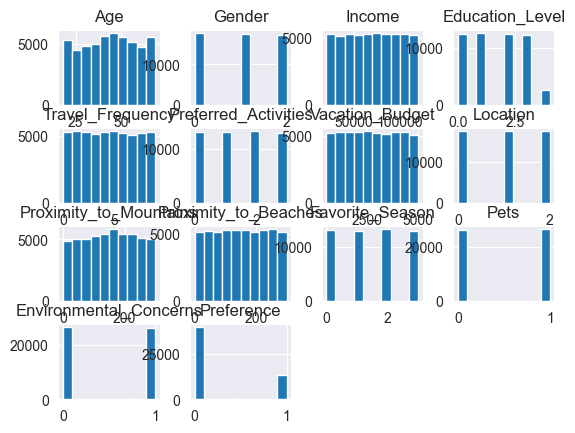

In [36]:
plt.figure(figsize=(15, 15))
df.hist()
plt.show()

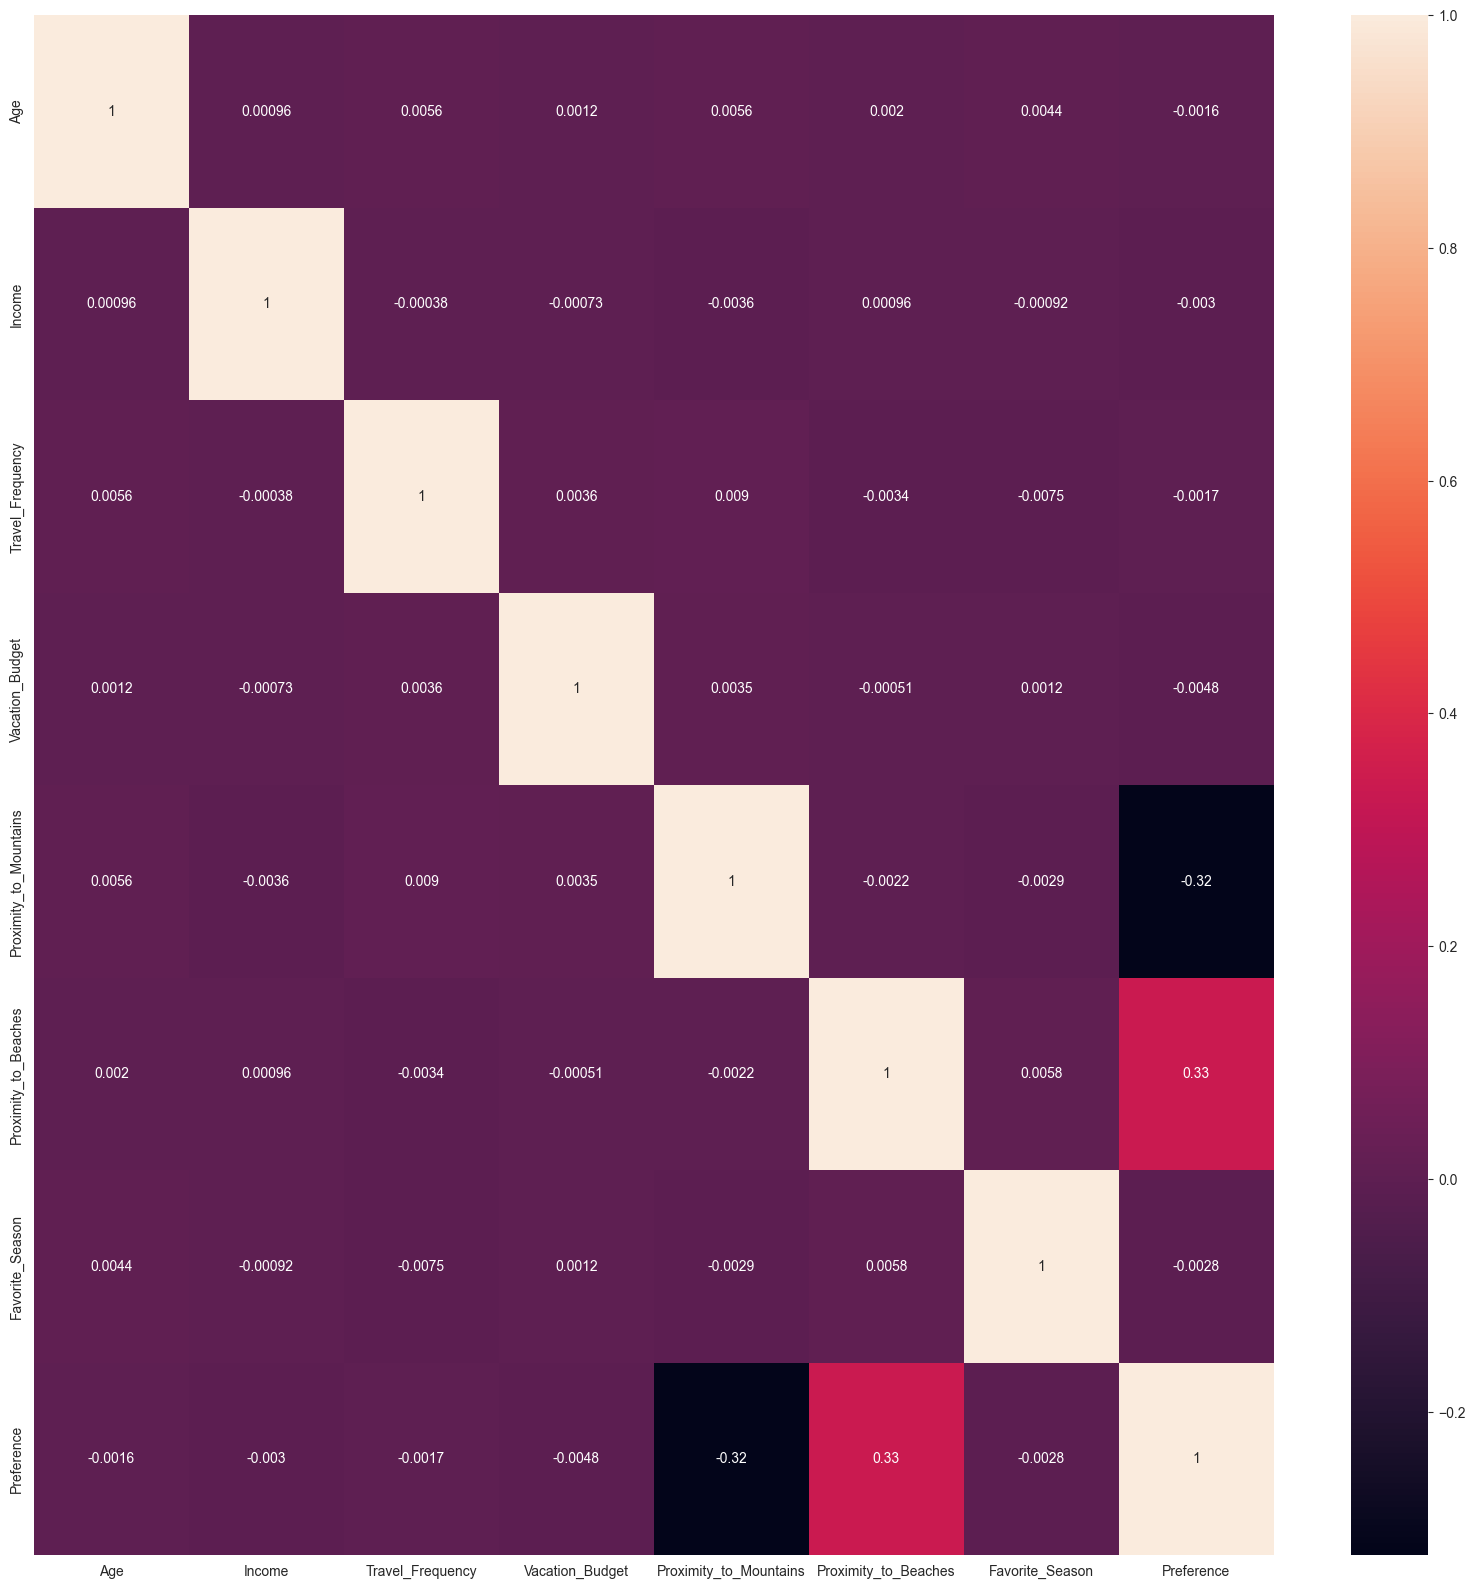

In [37]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.drop(columns=['Gender', 
                     'Education_Level', 
                     'Preferred_Activities', 
                     'Location', 
                     'Environmental_Concerns', 
                     'Pets']).corr(), annot=True)
plt.show()

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [38]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import train_test_split

# X -> features (vo slucajov se osven 'Preference' aka target)

X = df.drop(columns=['Preference'])

# Y -> target value (toa shto go predviduvas)

Y = df['Preference']

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## Feature Scaling
Standardize the features appropriately.

In [40]:
# Write your code here. Add as many boxes as you need.
min_max_scaler = MinMaxScaler()

In [41]:
min_max_scaler.fit(X_train)

X_train = min_max_scaler.transform(X_train)
X_test = min_max_scaler.transform(X_test)

## Model Selection

Choose and train an approriate model for the given task.

In [42]:
# Write your code here. Add as many boxes as you need.
# Za binarna klasifikacija, dobro e CatBoost
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from random import seed

classifier_knn = KNeighborsClassifier(n_neighbors=5)

classifier_catb = CatBoostClassifier(loss_function='Logloss',
          eval_metric='AUC',
          verbose= 200,
          random_seed= seed(1))

In [43]:
classifier_knn.fit(X_train,Y_train)
classifier_catb.fit(X_train,Y_train)

Learning rate set to 0.0508
0:	total: 64.8ms	remaining: 1m 4s
200:	total: 1.42s	remaining: 5.63s
400:	total: 2.76s	remaining: 4.12s
600:	total: 3.85s	remaining: 2.56s
800:	total: 5.28s	remaining: 1.31s
999:	total: 6.81s	remaining: 0us


Use the trained model to make predictions for the test set.

In [44]:
# Write your code here. Add as many boxes as you need.
y_pred_knn = classifier_knn.predict(X_test)
y_pred_classifier = classifier_catb.predict(X_test)

Assess the performance of the model by using different classification metrics.

In [45]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, y_pred_knn))
print(classification_report(Y_test, y_pred_knn))
print(confusion_matrix(Y_test, y_pred_classifier))
print(classification_report(Y_test, y_pred_classifier))

[[7480  352]
 [ 531 2126]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7832
           1       0.86      0.80      0.83      2657

    accuracy                           0.92     10489
   macro avg       0.90      0.88      0.89     10489
weighted avg       0.91      0.92      0.91     10489

[[7771   61]
 [  65 2592]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7832
           1       0.98      0.98      0.98      2657

    accuracy                           0.99     10489
   macro avg       0.98      0.98      0.98     10489
weighted avg       0.99      0.99      0.99     10489



# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [46]:
# Write your code here. Add as many boxes as you need.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

## Feature Scaling
Standardize the features appropriately.

In [47]:
# Write your code here. Add as many boxes as you need.
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)

X_train = min_max_scaler.transform(X_train)
X_test = min_max_scaler.transform(X_test)

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [48]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

param_grid = {
    'n_neighbors': np.arange(5, 40, 5)
}

knn_model = KNeighborsClassifier()

cv = RepeatedKFold(n_splits=6, n_repeats=5, random_state=1)


grid_search = GridSearchCV(estimator=knn_model, 
                           param_grid=param_grid, 
                           cv=cv, 
                           n_jobs=-1, 
                           verbose=2)

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters found: ", best_params)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

Fitting 30 folds for each of 7 candidates, totalling 210 fits
Best Hyperparameters found:  {'n_neighbors': 35}


## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [49]:
# Write your code here. Add as many boxes as you need.
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[3898   47]
 [ 259 1041]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3945
           1       0.96      0.80      0.87      1300

    accuracy                           0.94      5245
   macro avg       0.95      0.89      0.92      5245
weighted avg       0.94      0.94      0.94      5245

